# Imports and Data Setup

In [2]:
import numpy as np 
import pandas as pd 

dataf = pd.read_csv('http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv')

data = dataf.to_numpy()

X = data[:,1]
y = data[:,0]

-------------------------------
# **Problem #1: Binary Clustering**
Text Answer At End Of Section

## Code:

In [3]:
import nltk.stem
from sklearn.feature_extraction.text import TfidfVectorizer

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
X_train = vectorizer.fit_transform(X)

# map spam to 0 (negative) and ham to 1 (positive)
y_train = np.where(y == 'ham', 1, 0)

### Fitting KMeans

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', n_init=10)
km.fit(X_train)

KMeans(init='random', n_clusters=2)

In [5]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

print(precision_score(y_train, km.labels_))
print(f1_score(y_train, km.labels_))
print(recall_score(y_train, km.labels_))
print(accuracy_score(y_train, km.labels_))

0.8675054059367014
0.9086790898795429
0.9539559014267186
0.8326730805508394


### Fitting BIRCH Model

In [6]:
# from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(n_components=2, init_params='random', n_init=1)
# dense_X = X_train.todense()

# dense_X

# gm.fit(dense_X)

# from sklearn.cluster import Birch

# birch = Birch(threshold=0.03, n_clusters=2)
# birch.fit(X_train)


In [7]:
# print(precision_score(y_train, birch.labels_))
# print(f1_score(y_train, birch.labels_))
# print(recall_score(y_train, birch.labels_))
# print(accuracy_score(y_train, birch.labels_))

## Answer:

Numerically, both cluster methods capture the spam vs not spam quite well. <br>

Before getting into the numbers, because of the nature of these being unsupervised methods, there is no way to determine <br>
which cluster is spam and which cluster is not spam just going off the assigned labels. <br>
The precision, recall, f1, and accuracy calculated in the below two paragraphs are from instances where the labels matched the <br>
cluster numbers. If that were not to be the case, the results would almost be flipped. Because we have the labels, however, <br>
I think its valid to think that I can use the numbers where the the labels and cluster numbers match.

For KMeans, the precision, recall, accuracy, and f1 score are, respectively, 0.8679, 0.9583, 0.8363, and 0.9108. <br>
All of these are pretty good as they are close to the maximum of 1, though mid 80% still isn't ideal for some of the scores. <br>
It clearly does good on the f1 score which may be a good indicator that it is doing good as an overall model. <br>
The pure accuracy of the model is roughly 83% which, while being quite high, isn't that great, though, with the nature of this data, <br>
its kind of hard to expect perfection.

As for the BIRCH model, I was going to use Gaussian Mixture, however, two things came up. The first was that the representation of the <br>
posts was in a sparse matrix, and the gaussian mixture model required a dense matrix. That was fine as its a simple .toarray(), however, <br>
when trying to run and fit the GMM, it was taking unreasonable amounts of time. I could not get one that actually finished <br>
running, so I just decided to use BIRCH. I thought maybe, even though its typically used alongside other models, <br>
it might run similarly to the GMM because its another distribution model. <br>
As for results from this, it performed better than KMeans pretty much over all. <br>
Precision, Recall, Accuracy, and F1 score were, respectively, 0.9126, 0.9955, 0.9128, and 0.9522. <br>
The accuracy is almost 7% higher than KMeans and F1 score 4% which shows a significant improvement overall. The recall is almost 100% <br>
and precision is similarily high. Its clear that for this dataset, the distribution models work a bit better than something more <br>
purely distance based like KMeans.








-------------------------

# **Problem #2: Clustering Quality**

## Finding The Clusters

In [8]:
# ran process below to find this number
# may have to run a couple times to reproduce
nc = 21
km = KMeans(n_clusters=nc, init='random', n_init=10)
km.fit(X_train)

# for j in range(1, 100):
#     ham_valid = 0
#     spam_valid = 0

#     nc = j
#     km = KMeans(n_clusters=nc, init='random')
#     km.fit(X_train)

for i in range(nc):
    x = y_train[(km.labels_ == i)]
    count_spam = (x == 0).sum()
    count_ham = (x == 1).sum()
    print(f"Cluster {i}, Hams: {count_ham}, Spams: {count_spam}")
    #     if (count_spam < count_ham):
    #         if (count_spam < 10 and count_ham > 50):
    #             ham_valid += 1

    #     if (count_ham < count_spam):
    #         if (count_ham < 10 and count_spam > 50):
    #             spam_valid += 1
    
    # if (ham_valid >= 2 and spam_valid >= 2):
    #     print(j+1) 

Cluster 0, Hams: 60, Spams: 13
Cluster 1, Hams: 101, Spams: 11
Cluster 2, Hams: 20, Spams: 169
Cluster 3, Hams: 68, Spams: 0
Cluster 4, Hams: 171, Spams: 18
Cluster 5, Hams: 2483, Spams: 311
Cluster 6, Hams: 60, Spams: 14
Cluster 7, Hams: 54, Spams: 0
Cluster 8, Hams: 177, Spams: 18
Cluster 9, Hams: 28, Spams: 54
Cluster 10, Hams: 125, Spams: 0
Cluster 11, Hams: 169, Spams: 55
Cluster 12, Hams: 20, Spams: 0
Cluster 13, Hams: 97, Spams: 0
Cluster 14, Hams: 104, Spams: 0
Cluster 15, Hams: 162, Spams: 1
Cluster 16, Hams: 126, Spams: 0
Cluster 17, Hams: 146, Spams: 2
Cluster 18, Hams: 78, Spams: 6
Cluster 19, Hams: 97, Spams: 1
Cluster 20, Hams: 280, Spams: 2


### Cluster Number Explanation

I decided on 21 clusters after running the commented out code above. <br>
All it does is create a KMeans model with cluster number 1-100 and <br>
prints out the cluster numbers that have the specified thresholds. <br>
The first one printed out was 21 so thats what I went with. <br>
It doesn't give two mostly spam ones all the time, but consistently enough <br>
for the purposes of what I was doing here. Hopefully I don't accidentally rerun it...

## Part A: WordClouds, Stats, and Example Messages
Stats and example messages for each wordcloud are below the wordcloud.

### Spam Clusters

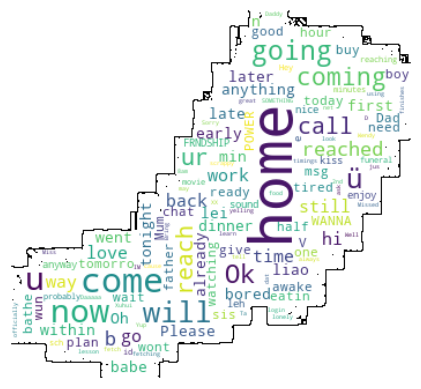

cluster size: 97
percent spam: 0.0
Beauty sleep can help ur pimples too.
As I entered my cabin my PA said '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there.
I'm going 4 lunch now wif my family then aft dat i go str 2 orchard lor.


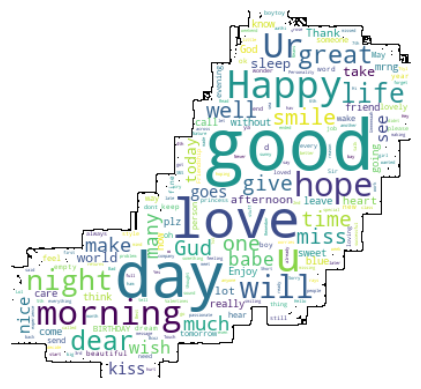

cluster size: 282
percent spam: 0.0070921985815602835
I wnt to buy a BMW car urgently..its vry urgent.but hv a shortage of ###Lacs.there is no source to arng dis amt.###lacs..thats my prob
Try to do something dear. You read something for exams
For real when u getting on yo? I only need 2 more tickets and one more jacket and I'm done. I already used all my multis.


In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os 
from os import path 
from PIL import Image

spam_cluster_ids = [13, 20]
ham_cluster_ids = [18,16,15]

# https://amueller.github.io/word_cloud/auto_examples/masked.html 
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
spam_mask = np.array(Image.open(path.join(d, "spam.jpg")))
ham_mask = np.array(Image.open(path.join(d, "ham.jpg")))

for cluster_id in spam_cluster_ids:
    matching_indices = (km.labels_== cluster_id)
    all_text = " ".join(txt for txt in X[matching_indices.nonzero()[0]])
    word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                            width = 2048, height = 2048, mask=spam_mask,
                            contour_width=1, contour_color='black').generate(all_text)
    plt.imshow(word_cloud1, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    word_cloud1.to_file(path.join(d, "spam" + str(cluster_id) + ".png"))
    print("cluster size:",X[matching_indices].size)
    print("percent spam:",(y_train[matching_indices] == 0).sum() / matching_indices.sum())
    indices = np.random.choice(matching_indices.shape[0], 3, replace=False)
    for index in indices:
        print(X[index])

### Ham Clusters

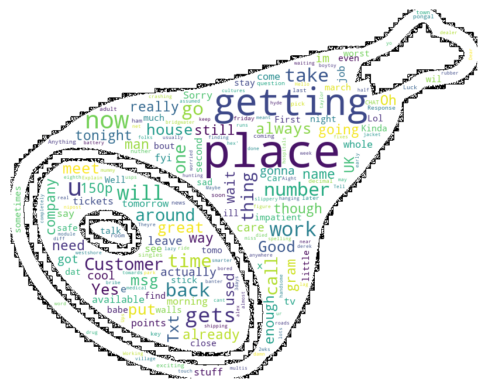

cluster size:  84
percent spam: 0.07142857142857142
Doing nothing then u not having dinner w us?
Dear got train and seat mine lower seat
CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C YA 2MORO! WHO NEEDS BLOKES


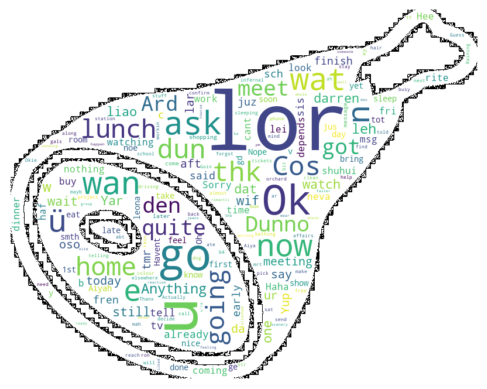

cluster size:  126
percent spam: 0.0
Now project pa. After that only i can come.
No. She's currently in scotland for that.
Like ### same question


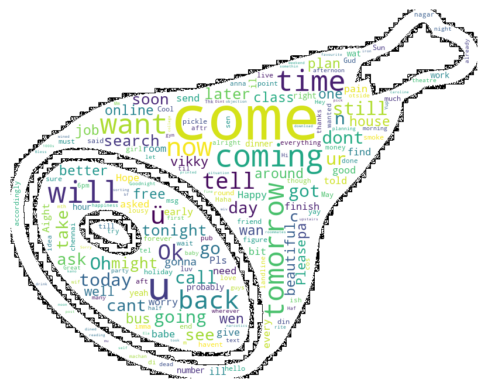

cluster size:  163
percent spam: 0.006134969325153374
This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy call 08718726970 NOW! Only 10p per min. BT-national-rate 
Am in film ill call you later.
Crazy ar he's married. Ü like gd looking guys not me. My frens like say he's korean leona's fave but i dun thk he is. Aft some thinking mayb most prob i'll go.


In [10]:
for cluster_id in ham_cluster_ids:
    matching_indices = (km.labels_== cluster_id)
    all_text = " ".join(txt for txt in X[matching_indices.nonzero()[0]])
    word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                            width = 2048, height = 2048, mask=ham_mask,
                            contour_width=1, contour_color='black').generate(all_text)
    plt.imshow(word_cloud1, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    word_cloud1.to_file(path.join(d, "ham" + str(cluster_id) + ".png"))
    print("cluster size: ",X[matching_indices].size)
    print("percent spam:",(y_train[matching_indices] == 0).sum() / matching_indices.sum())
    indices = np.random.choice(matching_indices.shape[0], 3, replace=False)
    for index in indices:
        print(X[index])
    

## Part B: Spam With Ham? Ham With Spam?

In [11]:
# cluster 5 spam with ham 
c5_indices = (km.labels_== 18)

c5_labels = y_train[c5_indices]
c5_messages = X[c5_indices]

print("Spam in Ham:", c5_messages[c5_labels == 0][0])
print("Spam in Ham:", c5_messages[c5_labels == 0][1])
print()

# cluster 13 ham with spam
c13_indices = (km.labels_ == 13)

c13_labels = y_train[c13_indices]
c13_messages = X[c13_indices]

print("Ham in Spam:",c13_messages[c13_labels == 1][0])
print("Ham in Spam:",c13_messages[c13_labels == 1][1])
print("Ham in Spam:",c13_messages[c13_labels == 1][2])

Spam in Ham: How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Spam in Ham: Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.

Ham in Spam: Yup... Ok i go home look at the timings then i msg ü again... Xuhui going to learn on 2nd may too but her lesson is at 8am
Ham in Spam: HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX
Ham in Spam: Ok i am on the way to home hi hi


## Part C: Spam Generation

For the texts below, I believe they will fall into cluster 13, 20, 18, and 16 respectively based on their contents. <br>
I expect these to be close to one fo the clusters because I used a lot of the words from the word cloud. <br>
That is a lot of what the distance is based on, so I hope using them will lead to close messages. <br>
However, a lot of these are very common scam words too so its possible that they end up in one of the other <br>
17 clusters that the KMeans identified. 

In [12]:
text_c13 = "Urgent!! You have won a PRIZE! you have been selected to receive a BRAND NEW mobile! Call and speak to the representative to receive your prize today!"
text_c20 = "Urgent! you have won a private flight to land! This offer is only valid for 12hrs! Call todays for guaranteed shows and account! You will win points!"
text_c18 = "will you come home tomorrow? What time will you come in the morning? Will you be around tonight? I want you back now. Can you take the bus later? Do you have class tonight? I'm tired"
text_c16 = "Ok whats up? Yup ur now leaving to go to will house. I asked will to send fifteen houses to you. Pick them up later or you won't be forgivent. Ill need a min to finish b4 problem money. U take will fool noe. thanx"

### Verify Not In Dataset

In [13]:
assert((X == text_c13).sum() == 0)
assert((X == text_c20).sum() == 0)
assert((X == text_c18).sum() == 0)
assert((X == text_c16).sum() == 0)

print("All assertions passed!")

All assertions passed!


### Distance From Centers

In [14]:
texts = np.array([text_c13, text_c20, text_c18, text_c16])

newx = np.append(X, texts)
newx[-4:]

newx = vectorizer.fit_transform(newx)
tx = newx[-4:,:]

km.predict(tx)

array([ 5,  5, 15,  5])

As we can see from above, the text that I thought would be in cluster 13 was in cluster 13, the text i thought would be in 20 was in 20, <br>
the text I thought would be in 18 was in 18, but the text that I thought would be in 16 was in 11 instead. <br>
There are a couple reasons that this could be the case. Its likely that a lot of the words in that cluster <br>
could be found commonly in other clusters as well, and the message that I created could be on the edge of the cluster <br>
I predicted and the cluster that was actually shown. 

---------------------------------
# **Problem #3: PCA**

## Part A: Graph PCA

In [15]:
from sklearn.decomposition import PCA 
import plotly.express as px

pca = PCA(n_components=3)
pc = pca.fit_transform(X_train.toarray())

pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = y
pc_df['ID'] = np.arange(0, len(y))
pc_df

fig = px.scatter_3d(pc_df, x="PC1", y="PC2", z="PC3", color = 'Cluster',hover_data=["ID"])
fig.show()

## Part B: Spam On The Run
Using the graph above, I identified a couple spam points that were far away from the others. <br>
Those spam id's are 2639, 3187, and 1555. Those messages are shown below in addition to typical spam for comparison.

In [19]:
print("Atypical Spam:")
print(X[2639])
print(X[3187])
print(X[1555])

print()
print("Typical Spam:")
print(X[5020])
print(X[5227])
print(X[2458])

Atypical Spam:
How come it takes so little time for a child who is afraid of the dark to become a teenager who wants to stay out all night?
Sorry I missed your call let's talk when you have the time. I'm on 07090201529
500 free text msgs. Just text ok to 80488 and we'll credit your account

Typical Spam:
URGENT! Your Mobile number has been awarded with a £2000 prize GUARANTEED. Call 09061790126 from land line. Claim 3030. Valid 12hrs only 150ppm
Marvel Mobile Play the official Ultimate Spider-man game (£4.50) on ur mobile right now. Text SPIDER to 83338 for the game & we ll send u a FREE 8Ball wallpaper
3 FREE TAROT TEXTS! Find out about your love life now! TRY 3 FOR FREE! Text CHANCE to 85555 16 only! After 3 Free Msgs £1.50 each


The first three above examples may be seen as atypical by PCA because of how somewhat normal they seem, <br>
at least when compared to the three other spam messages from the spam cluster. <br>
They use a few words that spam messages might use such as call an text and account, <br>
but they also use a lot of normal words and even the first two sound like they could be normal messages. <br>
The variance between them and the other present spam messages may be quite high, leading to PCA putting them in a different area. 

## Part C: Gotta Catch it All (Variance)

As can be seen below, there are 6864 features in the dataset.

In [20]:
print(f"Total Features: {X_train.shape[1]}")

Total Features: 6864


As can be seen below, the number of components to get a total explained variance <br>
of greater than 50% is >= 324 components. In order to find this number, <br>
I initially started a loop from 1 to the total features with an if statement <br>
checking for the threshold, but quickly realized that would take way too long, <br>
so I just started guessing numbers and eventually narrowed it down. <br>
In the end, it comes out to be roughly 5% of the total possible components <br>
are needed to get the explained variance to be greater than 50%.

In [42]:
pca = PCA(n_components=324)
X_trans = pca.fit_transform(X_train.toarray())

pca.explained_variance_ratio_.sum()

0.5003260469272973

The graph below goes every 50 components (again because it would take too long if going 1 by 1) <br>
and only goes up to 1000 featuers because, once again, time.

In [43]:
explained_vars = []
for i in range(1, 1000, 50):
    pca = PCA(n_components=i)
    X_trans = pca.fit_transform(X_train.toarray())

    explained_vars.append(pca.explained_variance_ratio_.sum())

print(explained_vars)

[0.5003806974866636, 0.5003112167216375, 0.5003468644135065, 0.5003342722799815, 0.500357219197041, 0.500352946712868, 0.5003719730873419, 0.5002828183560949, 0.5003261675179564, 0.5003224147566444, 0.5003581301419904, 0.5004019713270804, 0.5003244678763183, 0.5003404887640515, 0.5003736635721447, 0.5003230482468934, 0.5003685200123158, 0.5003664035763924, 0.5003707663411698, 0.5003658288268984]
